<a href="https://colab.research.google.com/github/AVI18794/NLP/blob/master/Detecting_Deceptive_Reviews_using_Natural_Language_Processing_19_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center><h1>DETECTING DECEPTIVE REVIEWS USING NLP**



Note : Currently Working on this in free time.:
Link to the paper:- [Negative Deceptive Opinion Spam](https://www.cs.cornell.edu/home/cardie/papers/NAACL13-Negative.pdf)

Date: 24 Feb 2020

In [0]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
# !pip install wget
# !python -m spacy download en_core_web_lg

**Collecting Data**

In [3]:
#Get the data
import wget
wget.download('https://myleott.com/op_spam_v1.4.zip')

'op_spam_v1.4.zip'

**Unzipping the folder to load the data**

In [0]:
import zipfile
with zipfile.ZipFile('/content/op_spam_v1.4.zip','r') as z:
  z.extractall()

**Importing the data**

In [0]:
import os
def list_files(startpath):
  for root,dirs,files in os.walk(startpath):
    level = root.replace(startpath,'').count(os.sep)
    indent = ' ' * 6 *(level)
    print('{}{}/'.format(indent,os.path.basename(root)))
    subindent = ' ' * 6 * (level+1)
    for f in files[:5]:
      print('{}{}'.format(subindent,f))
      

In [6]:
list_files('op_spam_v1.4/')

/
      LICENSE
      README.md
positive_polarity/
      deceptive_from_MTurk/
            fold1/
                  d_hilton_2.txt
                  d_monaco_14.txt
                  d_sofitel_15.txt
                  d_sofitel_16.txt
                  d_monaco_8.txt
            fold5/
                  d_palmer_18.txt
                  d_allegro_2.txt
                  d_allegro_10.txt
                  d_amalfi_19.txt
                  d_allegro_19.txt
            fold4/
                  d_sheraton_1.txt
                  d_swissotel_7.txt
                  d_sheraton_6.txt
                  d_homewood_2.txt
                  d_knickerbocker_13.txt
            fold3/
                  d_conrad_1.txt
                  d_hyatt_17.txt
                  d_fairmont_18.txt
                  d_conrad_16.txt
                  d_omni_1.txt
            fold2/
                  d_affinia_11.txt
                  d_ambassador_11.txt
                  d_hardrock_18.txt
                  d_hardro

**Reading the files in a DataFrame**

In [0]:
#Reading the positive reviews files inside positive_polarity
#Accessing data for Positive True Reviews
import glob
import ntpath
path = 'op_spam_v1.4/positive_polarity/'
files = [f for f in glob.glob(path+"**/*.txt",recursive=True)]

In [8]:
files[:5]

['op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold1/d_hilton_2.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold1/d_monaco_14.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold1/d_sofitel_15.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold1/d_sofitel_16.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold1/d_monaco_8.txt']

In [9]:
len(files)

800

In [10]:
filename = list()
reviews = list()
for file in files:
  with open(file,'r') as f:
    filename.append(ntpath.basename(file))
    reviews.append(f.read())

positive_df = pd.DataFrame({'filename':filename,'review':reviews})
positive_df.head()

,filename,review
0,d_hilton_2.txt,The Hilton Hotel helped us make the most of ou...
1,d_monaco_14.txt,I have heard friends talking about the Hotel M...
2,d_sofitel_15.txt,My husband and I recently stayed at the Sofite...
3,d_sofitel_16.txt,I think the Sofitel Chicago Water Tower is a u...
4,d_monaco_8.txt,My stay at the Hotel Monaco recently was fanta...


In [11]:
positive_df.shape

(800, 2)

In [12]:
#Read the negative reviews in the dataframe
path = 'op_spam_v1.4/negative_polarity/'
files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]
filename= list()
reviews= list()
for file in files:
    with open(file, 'r') as f:
        filename.append(ntpath.basename(file))
        reviews.append(f.read())
neagtive_df= pd.DataFrame({'filename': filename, 'review': reviews})
neagtive_df.head()

,filename,review
0,t_hilton_13.txt,"I checked into this hotel, Rm 1760 on 11/13/20..."
1,t_monaco_13.txt,We got a spanking deal at this hotel for $99 a...
2,t_sofitel_8.txt,"I was looking for a fun, contemporary hotel an..."
3,t_monaco_8.txt,Don't stay here if you take peace in knowing y...
4,t_hilton_17.txt,I stayed at the Hilton Chicago last week and w...


In [13]:
neagtive_df.head()

,filename,review
0,t_hilton_13.txt,"I checked into this hotel, Rm 1760 on 11/13/20..."
1,t_monaco_13.txt,We got a spanking deal at this hotel for $99 a...
2,t_sofitel_8.txt,"I was looking for a fun, contemporary hotel an..."
3,t_monaco_8.txt,Don't stay here if you take peace in knowing y...
4,t_hilton_17.txt,I stayed at the Hilton Chicago last week and w...


**Data Preparation**

In [0]:
#Merge positive and negative reviews dataframes and assignning a label to it
positive_df['polarity'] = ['positive']*positive_df.shape[0]
neagtive_df['polarity'] = ['negative'] * neagtive_df.shape[0]

In [15]:
positive_df.head()

,filename,review,polarity
0,d_hilton_2.txt,The Hilton Hotel helped us make the most of ou...,positive
1,d_monaco_14.txt,I have heard friends talking about the Hotel M...,positive
2,d_sofitel_15.txt,My husband and I recently stayed at the Sofite...,positive
3,d_sofitel_16.txt,I think the Sofitel Chicago Water Tower is a u...,positive
4,d_monaco_8.txt,My stay at the Hotel Monaco recently was fanta...,positive


In [16]:
neagtive_df.head()

,filename,review,polarity
0,t_hilton_13.txt,"I checked into this hotel, Rm 1760 on 11/13/20...",negative
1,t_monaco_13.txt,We got a spanking deal at this hotel for $99 a...,negative
2,t_sofitel_8.txt,"I was looking for a fun, contemporary hotel an...",negative
3,t_monaco_8.txt,Don't stay here if you take peace in knowing y...,negative
4,t_hilton_17.txt,I stayed at the Hilton Chicago last week and w...,negative


In [0]:
#Concatenating the dataframes
final_df = pd.concat([positive_df,neagtive_df],axis=0,ignore_index=True)

In [18]:
final_df.head()

,filename,review,polarity
0,d_hilton_2.txt,The Hilton Hotel helped us make the most of ou...,positive
1,d_monaco_14.txt,I have heard friends talking about the Hotel M...,positive
2,d_sofitel_15.txt,My husband and I recently stayed at the Sofite...,positive
3,d_sofitel_16.txt,I think the Sofitel Chicago Water Tower is a u...,positive
4,d_monaco_8.txt,My stay at the Hotel Monaco recently was fanta...,positive


In [19]:
final_df.tail()

,filename,review,polarity
1595,d_affinia_4.txt,Affinia hotel in Chicago was one of the most i...,negative
1596,d_hardrock_3.txt,I would not reccomend staying at the Hard Rock...,negative
1597,d_hardrock_1.txt,The Hard Rock should stick to restaurants. Aft...,negative
1598,d_talbott_11.txt,We chose the Talbott Hotel primarily for the l...,negative
1599,d_talbott_2.txt,I had heard good things regarding the plush ac...,negative


In [20]:
final_df.shape

(1600, 3)

In [21]:
final_df['hotel']= final_df.filename.str.extract('_(.*)_')
final_df.hotel.head()

0     hilton
1     monaco
2    sofitel
3    sofitel
4     monaco
Name: hotel, dtype: object

In [0]:
final_df['label']= final_df.filename.str[0].map({'d':'deceptive', 't': 'true'})

In [23]:
final_df['label'].head()

0    deceptive
1    deceptive
2    deceptive
3    deceptive
4    deceptive
Name: label, dtype: object

In [24]:
final_df.head()

,filename,review,polarity,hotel,label
0,d_hilton_2.txt,The Hilton Hotel helped us make the most of ou...,positive,hilton,deceptive
1,d_monaco_14.txt,I have heard friends talking about the Hotel M...,positive,monaco,deceptive
2,d_sofitel_15.txt,My husband and I recently stayed at the Sofite...,positive,sofitel,deceptive
3,d_sofitel_16.txt,I think the Sofitel Chicago Water Tower is a u...,positive,sofitel,deceptive
4,d_monaco_8.txt,My stay at the Hotel Monaco recently was fanta...,positive,monaco,deceptive


In [0]:
final_df.drop('filename', axis=1, inplace= True)

In [0]:
# Save this to a CSV
final_df.to_csv('final_df.csv', index= False)

In [0]:
df= final_df.copy()

**Exploratory Data Analysis**

In [28]:
df.groupby(['polarity', 'label']).count()

review  hotel
polarity label                   
negative deceptive     400    400
         true          400    400
positive deceptive     400    400
         true          400    400

In [29]:
df.hotel.unique()

array(['hilton', 'monaco', 'sofitel', 'james', 'palmer', 'allegro',
       'amalfi', 'intercontinental', 'sheraton', 'swissotel', 'homewood',
       'knickerbocker', 'conrad', 'hyatt', 'fairmont', 'omni', 'affinia',
       'ambassador', 'hardrock', 'talbott'], dtype=object)

In [30]:
df.groupby(['hotel', 'polarity']).count()

review  label
hotel            polarity               
affinia          negative      40     40
                 positive      40     40
allegro          negative      40     40
                 positive      40     40
amalfi           negative      40     40
                 positive      40     40
ambassador       negative      40     40
                 positive      40     40
conrad           negative      40     40
                 positive      40     40
fairmont         negative      40     40
                 positive      40     40
hardrock         negative      40     40
                 positive      40     40
hilton           negative      40     40
                 positive      40     40
homewood         negative      40     40
                 positive      40     40
hyatt            negative      40     40
                 positive      40     40
intercontinental negative      40     40
                 positive      40     40
james            negative      40     40
                 positive      40     40
knickerbocker    negative      40     40
                 positive      40     40
monaco           negative      40     40
                 positive      40     40
omni             negative      40     40
                 positive      40     40
palmer           negative      40     40
                 positive      40     40
sheraton         negative      40     40
                 positive      40     40
sofitel          negative      40     40
                 positive      40     40
swissotel        negative      40     40
                 positive      40     40
talbott          negative      40     40
                 positive      40     40

**Comparing Word Count in True and Deceptive reviews**

In [0]:
#install the large model of spacy
# !python -m spacy download en_core_web_lg

In [0]:
import spacy
nlp= spacy.load('en_core_web_lg')

In [0]:
df['spacy']= df.review.str.lower().apply(nlp)

In [0]:
def word_count(row):
    return len(list(row))

df['word_count']= df.spacy.apply(word_count)

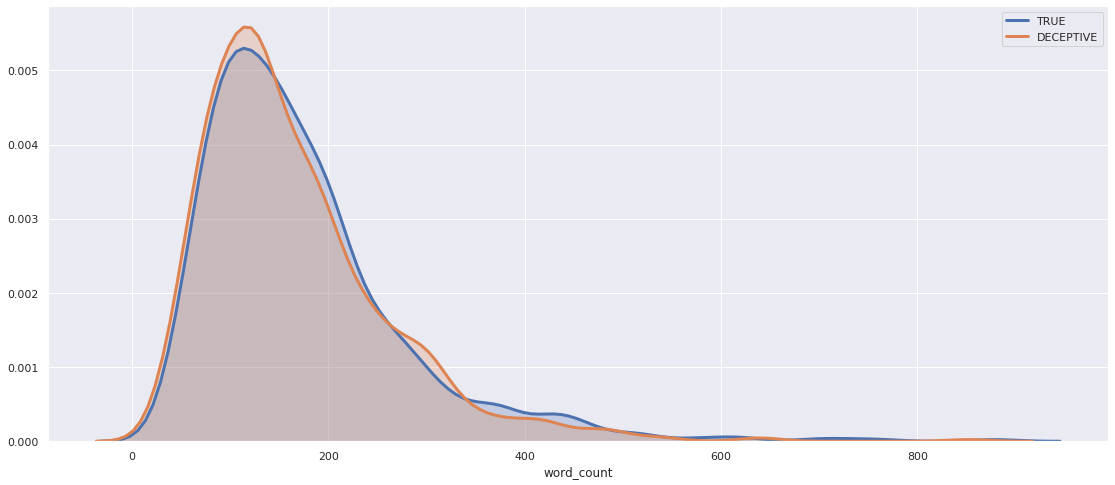

In [35]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'word_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'word_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

In [0]:
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
punc= list(set(string.punctuation))
def punc_count(row):
    return count(row, punc)

df['punc_count']= df.review.apply(punc_count)

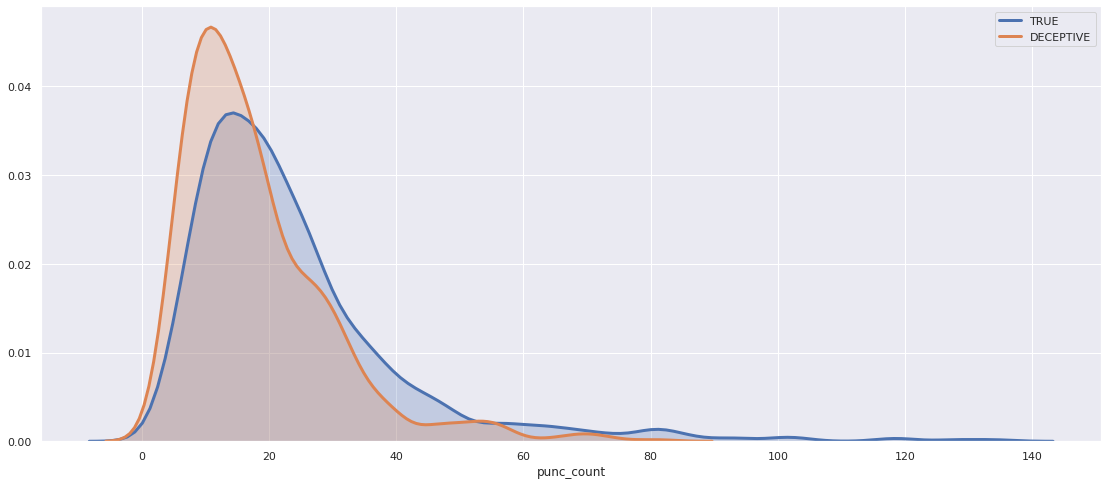

In [37]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'punc_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'punc_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

In [38]:
# Comapring Describe in the True and Deceptive Reviews
pd.DataFrame({'True': df[df.label == 'true']['punc_count'].describe().values, 
             'Deceptive': df[df.label == 'deceptive']['punc_count'].describe().values},
              index= df.describe().index)

,True,Deceptive
count,800.000000,800.000000
mean,23.870000,18.022500
std,17.290005,11.737833
min,1.000000,3.000000
25%,13.000000,10.000000
50%,20.000000,15.000000
75%,28.000000,24.000000
max,134.000000,81.000000


In [0]:
pd.set_option('display.max_rows', 1600)
df['hotel_name_count']= df.apply(lambda x: str(x.review).lower().count(str(x.hotel)), axis = 1)

In [40]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum()

label      polarity
deceptive  negative    426
           positive    465
true       negative    271
           positive    302
Name: hotel_name_count, dtype: int64

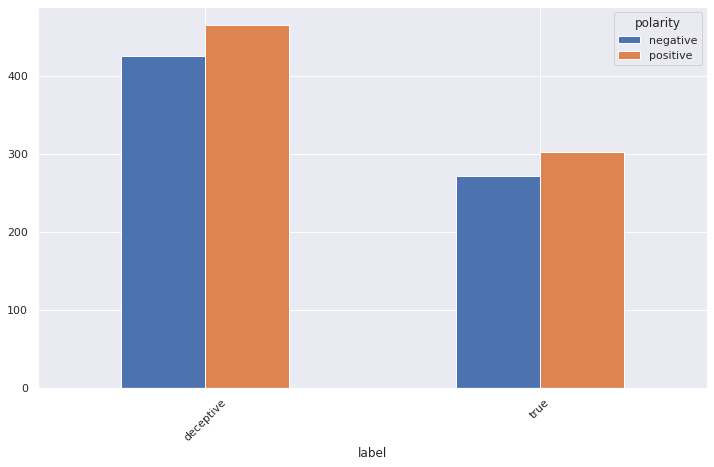

In [41]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum().unstack().plot(kind= 'bar', rot= 45, figsize= (12, 7));

Comparing Number of Unique words in reviews

In [0]:
df['unique_word_count'] = df['spacy'].apply(lambda x: len(set(list(x))))


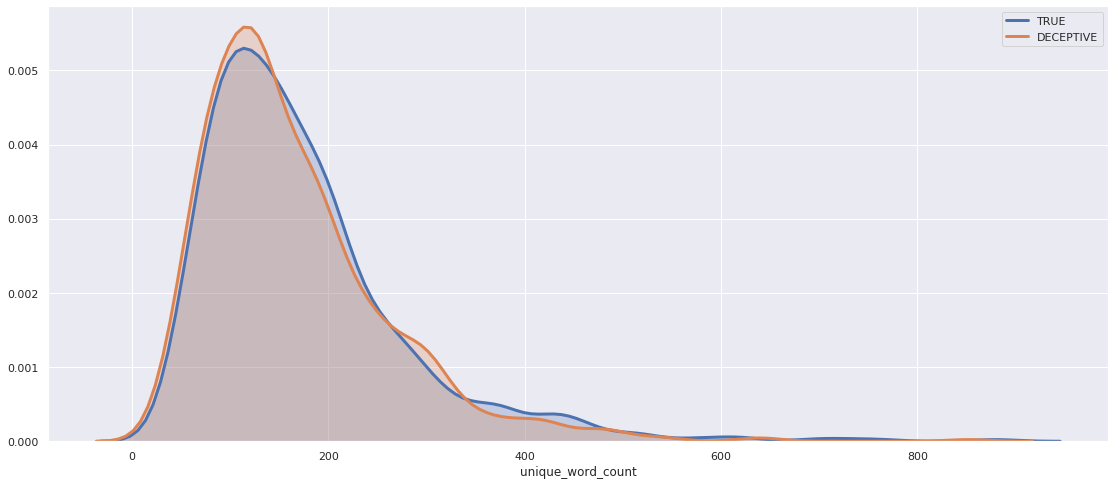

In [43]:
sns.set()
fig = plt.figure(figsize=(19,8))
sns.distplot(df.loc[df.label=='true','unique_word_count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':3},label='TRUE')
sns.distplot(df.loc[df.label=='deceptive','unique_word_count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':3},label='DECEPTIVE')

In [0]:
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
stop= list(nlp.Defaults.stop_words)

df['stop_count']= df.review.apply(lambda x: count(x, stop))

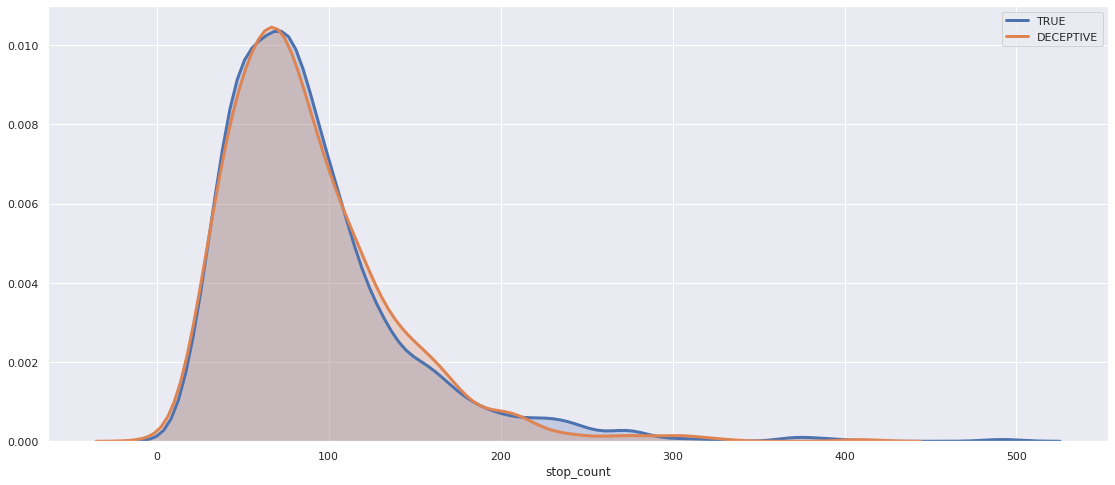

In [45]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'stop_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'stop_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

COUNTING POS TAGS IN REVIEWS


In [0]:
from collections import Counter
def pos_tag_count(df):
    
    # Create to empty lists in which we will store the list of POS Tags
    
    dec_pos_tags= list()
    true_pos_tags= list()
    # Iterate over Each Spacy Document Object
    
    for doc in df[df.label == 'true'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        true_dict = dict()
        
        # Spacy Returns a dictionary object with Hash Value of Pos and Counts
        # After every Iteration Update the POS Tag distioanry
        
        for key,value in sorted(TAG_count.items()):
            true_dict.update({ doc.vocab[key].text : value})
            
        # After updating the dict append it to the list we created at the very beiginning
        
        true_pos_tags.append(true_dict)
    
    # Then just follow the same above steps for the deceptive reviews as well  
    for doc in df[df.label == 'deceptive'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        dec_dict = dict()
        for key,value in sorted(TAG_count.items()):
            dec_dict.update({ doc.vocab[key].text : value})
        dec_pos_tags.append(dec_dict)
    
    '''    
    NoW the above returns a count object for each review in True and Deceptive we need to add them up
    for whole DataFrame using a counter object
    '''
    true_tag_count = Counter()
    for i in range(0,len(true_pos_tags)):
        true_tag_count = true_tag_count + Counter(true_pos_tags[i])
    dec_tag_count = Counter()
    for i in range(0,len(dec_pos_tags)):
        dec_tag_count = dec_tag_count + Counter(dec_pos_tags[i])
    true_tag_count = dict(true_tag_count)
    dec_tag_count = dict(dec_tag_count)
    
    ## Now Create a DataFrame for True Reviews with POS Tags and Counts
    true_pos = pd.DataFrame()
    true_pos['tag'] = true_tag_count.keys()
    true_pos['true_cnt'] = true_tag_count.values()
    
    ## Now Create a DataFrame for Deceptive Reviews with POS Tags and Counts
    dec_pos = pd.DataFrame()
    dec_pos['tag'] = dec_tag_count.keys()
    dec_pos['dec_cnt'] = dec_tag_count.values()
    
    # Merge these two DataFrames on Tag name
    reviews_tags = true_pos.merge(dec_pos, on='tag', how='left')
    reviews_tags = reviews_tags.set_index('tag')
    return reviews_tags

In [47]:
pos_tag_count(df).head(10)

,true_cnt,dec_cnt
tag,,
POS,153,179.0
RB,9068,9003.0
NNS,4759,4006.0
IN,13483,13139.0
VBG,1690,1900.0
",",4566,4182.0
VBN,2390,2286.0
TO,1951,2327.0
_SP,800,808.0


POS TAGS COUNT IN POSITIVE REVIEWS

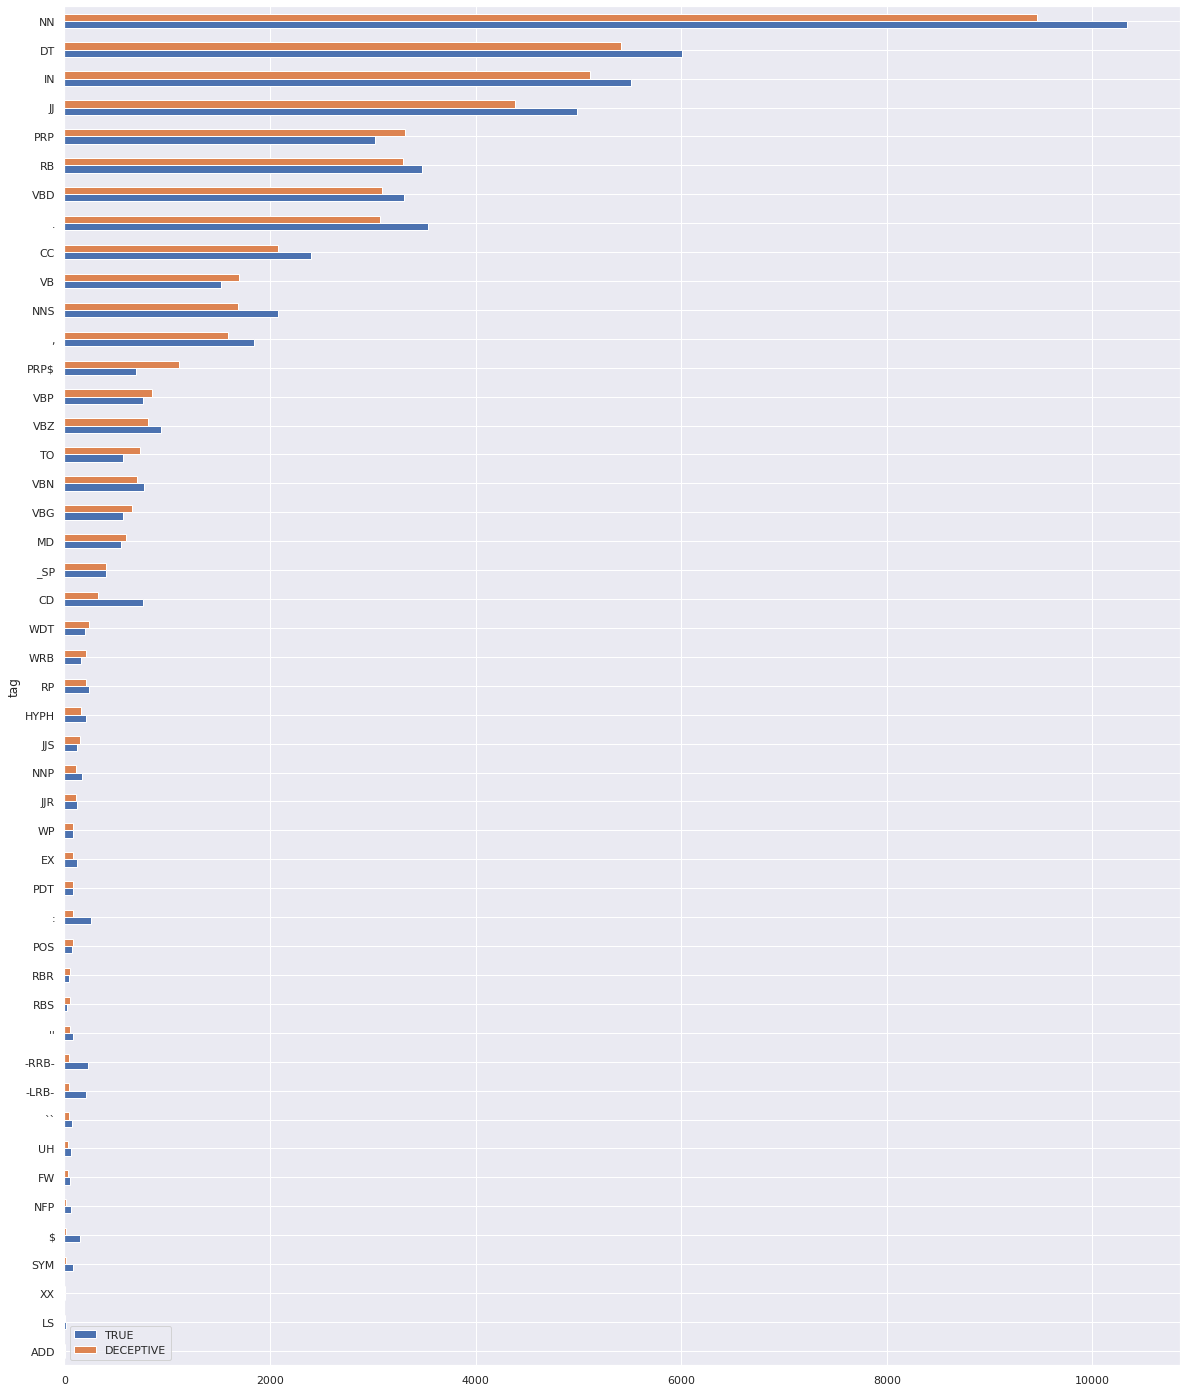

In [48]:
# POS Tags Counts in Positive Reviews
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'positive']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

POS TAGS COUNTS IN NEGATIVE REVIEWS

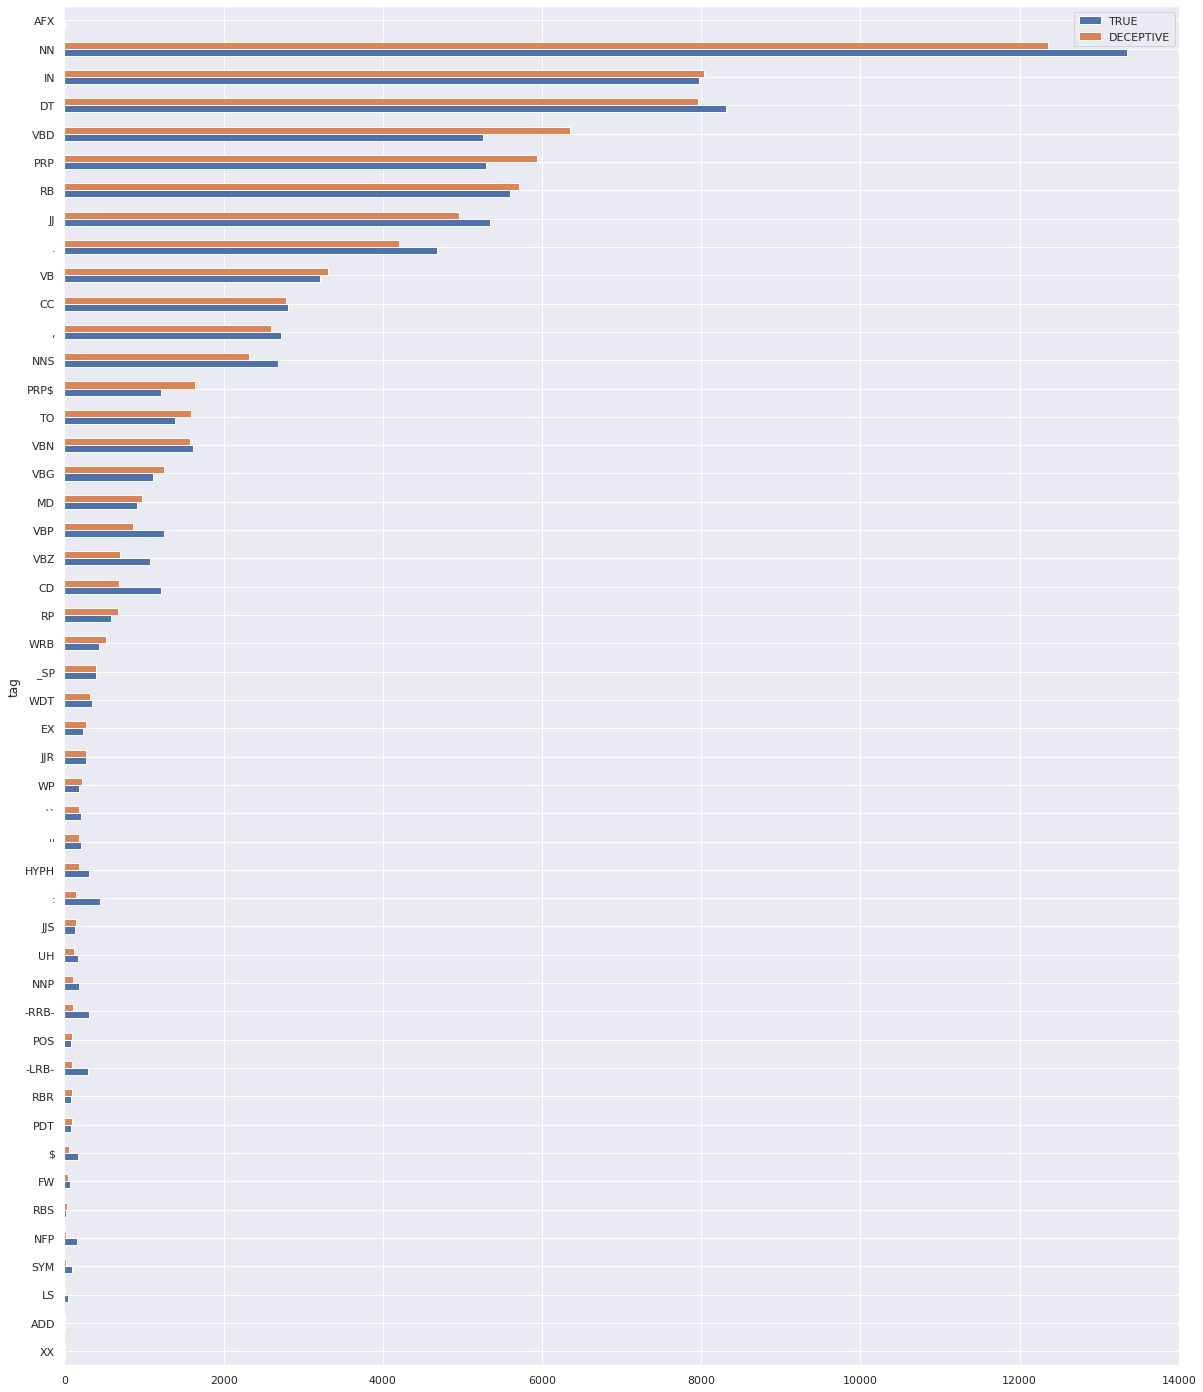

In [49]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'negative']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

POS TAGS COMBINING POSITIVE AND NEGATIVE SENTIMENTS

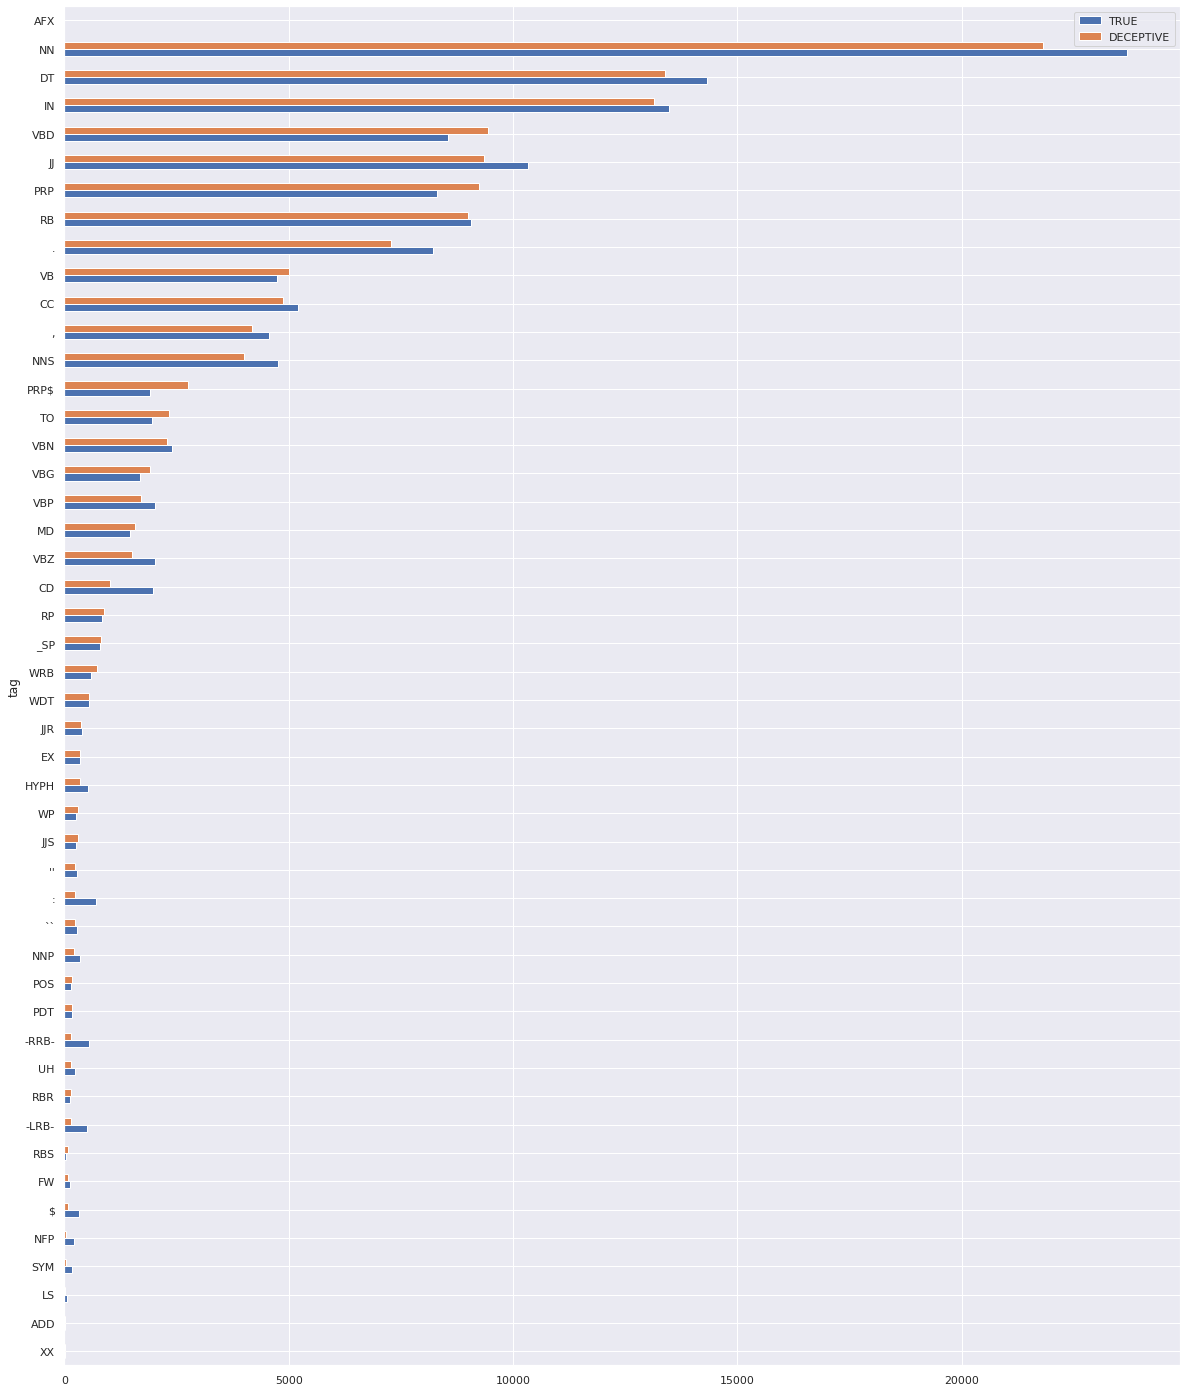

In [50]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

MOST FREQUENT WORDS IN THE REVIEWS

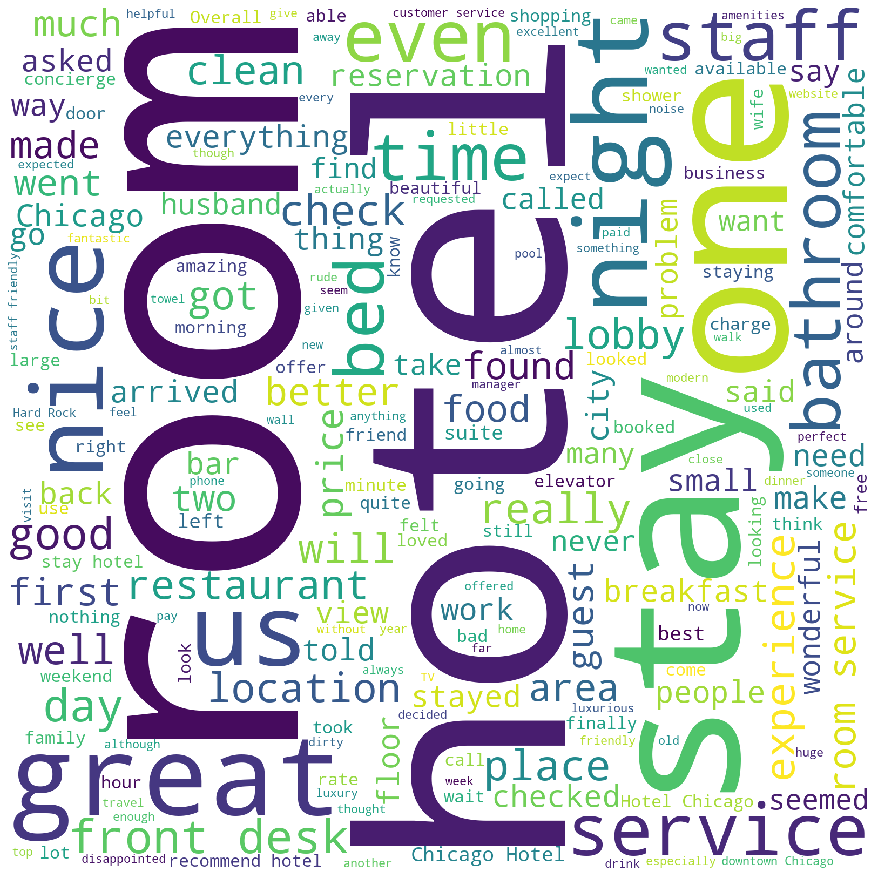

In [51]:
# Python program to generate WordCloud  
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd   
  
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',  
                min_font_size = 10).generate(".".join(df.review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

MOST FREQUENT WORDS IN TRUE REVIEWS

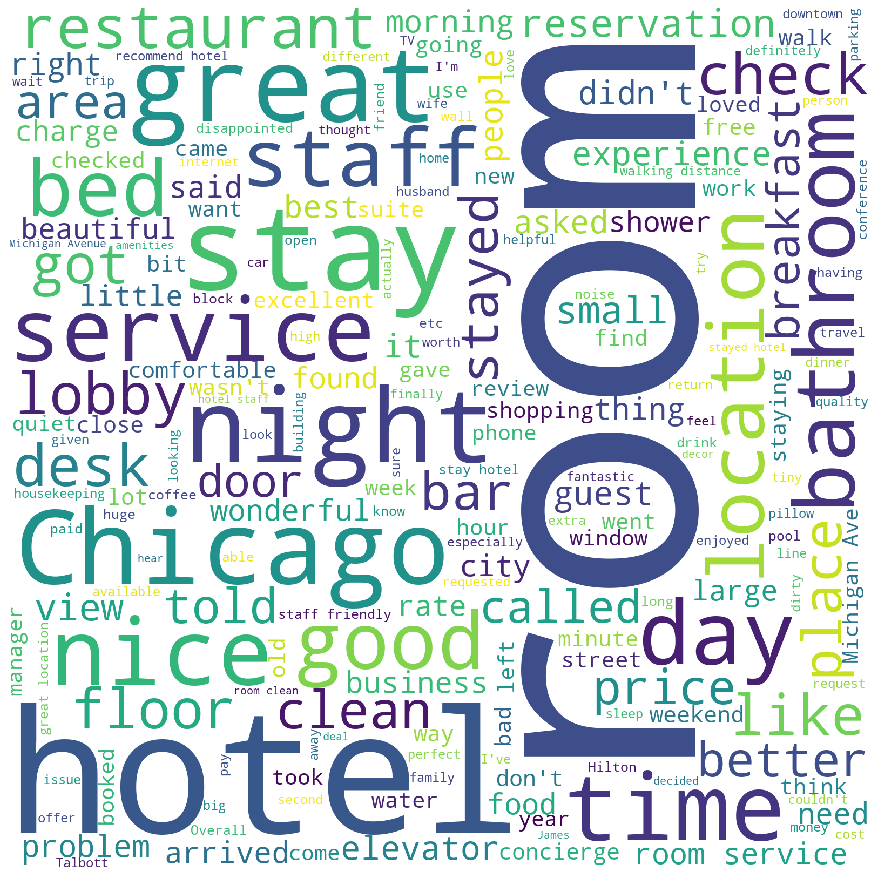

In [52]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'true'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

MOST FREQUENT WORDS IN DECEPTIVE REVIEWS

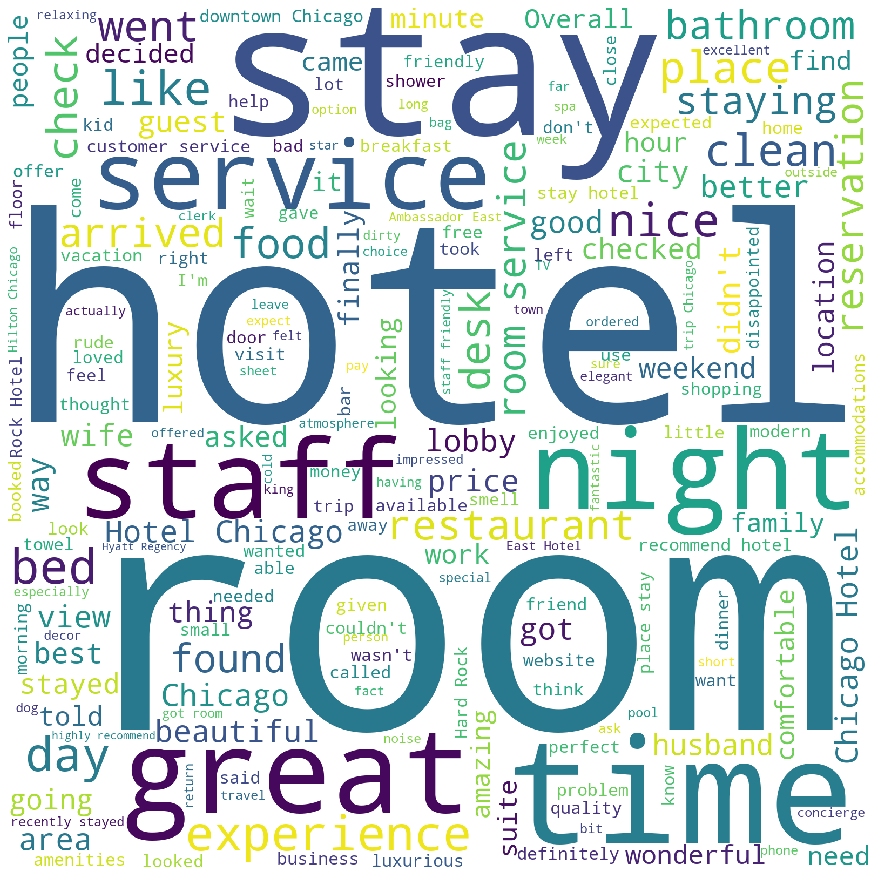

In [53]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'deceptive'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

CONVERTING TEXT INTO NUMBERS(FOR MACHINE INTERPRETATION)

In [0]:
X= df.review
y= df.label

TEXT PROCESSING

In [0]:
def preprocess(text):
    
    # Lower the Text
    text= text.lower()
    
    # Passing the text into SpaCy Document Object
    doc= nlp(text)
    
    # Extracting tokens out of SpaCy Document Object
    tokens= [str(t) for t in doc]
    
    # Removing the Punctuation
    tokens= [word.translate(str.maketrans('', '', string.punctuation)) for word in tokens]
    
    # remove words that contain numbers
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]
    
    # remove empty tokens
    tokens = [t for t in tokens if len(t) > 0]
    
    return tokens

TFIDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer= preprocess, ngram_range=(1,2), max_features = 5000, lowercase=False)
tfid = tfidf_vectorizer.fit_transform(X)

In [57]:
dense = tfid.todense()
dense.shape

(1600, 5000)

In [0]:
x= pd.DataFrame(dense)

TRAIN TEST SPLIT

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

MODEL BUILDING

In [60]:
# Fitting a simple logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   deceptive       0.89      0.87      0.88       204
        true       0.87      0.89      0.88       196

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [64]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.9608333333333333
Test Set Accuracy:  0.88


We can see that the model is overfitting. Our training set accuracy is 96% while test set accuracy is 86% and that too with a very basic linear classifier.Try tuning the hyperparameters.
* max_df
* ngram_range
* max_features

TUNING TFIDF VECTORIZER

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
## Create a pipeline which takes in tfidf vectoriser first and then a simple logistic Regression Model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer= preprocess, lowercase=False)),
    ('clf', LogisticRegression()),
])

Parameter tuning takes a lot of time in execution so skipping the hyper parameter tuning

In [0]:
# ## Pass in the Parameters in the pipeline 
# ## as these parameters belong to the tfidf in pipeline thats why you need to specify tfidf__ before the parameters
# parameters = {
#     'tfidf__max_df': [0.25, 0.5, 0.75],
#     'tfidf__ngram_range': [(1, 1), (1, 2)],
#     'tfidf__max_features': [1000, 1500, 2000, 2500, 3000]
# }

# grid_search_tune = GridSearchCV(pipeline, parameters, cv=5)
# grid_search_tune.fit(X, y)

# print("Best parameters set:")
# print(grid_search_tune.best_estimator_.steps)

**Filtering POS Tags**

In [0]:
#Filtering POS TAGS
from tqdm import tqdm
#Allowed POS TAGS
allowed_word_types = ["PRP", "JJ", "NNP", "NNS", "PRP$", "VBD", "VB"]

In [70]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [71]:
import nltk
nltk.pos_tag('we')

[('w', 'NN'), ('e', 'NN')]

In [72]:
all_words = []
for p in tqdm(X):
    # Preprocessing the text
    words = preprocess(p)
    # Getting the POS tags using NLTK pos_tags function
    pos = nltk.pos_tag(words)
    #####################################################################################################
    ### POS will have list of tuples where a tuple is a combination of word and POS Tag ('we', 'PRP') ###
    #####################################################################################################
    for w in pos:
        ### w is a tuple and second element is POS Tag 
        if w[1] in allowed_word_types:
            ## W[0] is the word
            all_words.append(str(w[0]))        
pos_word_final = list(set(all_words))

100%|██████████| 1600/1600 [00:52<00:00, 30.46it/s]


In [0]:
# Now TF-IDF vectorizer will form vocabulary on these words, that will form features essentially.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer= preprocess, ngram_range=(1,1), vocabulary = pos_word_final)
tfid = tfidf_vectorizer.fit_transform(X)
dense = tfid.todense()
x = pd.DataFrame(dense)

In [0]:
#Feature Selection
from sklearn.feature_selection import SelectPercentile, chi2
X_new = SelectPercentile(chi2, percentile=10).fit_transform(x, y)

In [75]:
X_new.shape

(1600, 491)

**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [77]:
#Model Building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   deceptive       0.87      0.90      0.88       192
        true       0.90      0.88      0.89       208

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



In [80]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy : ",accuracy_score(y_train,lr.predict(X_train)))
print("Test Set Accuracy : ", accuracy_score(y_test,y_pred))

Training Set Accuracy :  0.8966666666666666
Test Set Accuracy :  0.885


In [0]:
#Cross validation to check whether the model is overfitting or not
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X_train,y_train,cv=5)

In [82]:
scores
#The model is overfitting so lets try other method word embeddings precisely Google's Word2Vec

array([0.84166667, 0.85      , 0.85416667, 0.85416667, 0.85      ])

In [83]:
#Using pre-trained word embeddings 
import wget
wget.download('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz')

'GoogleNews-vectors-negative300.bin.gz'

In [0]:
#Load this vectors using gensim
import gensim
google_word2vec= gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [85]:
google_word2vec['hello'].shape

(300,)

In [0]:
def get_mean_vector(words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in google_word2vec.vocab]
    if len(words) >= 1:
        return np.mean(google_word2vec[words], axis=0)
    else:
        return []

In [0]:
x= df.spacy.apply(lambda x: get_mean_vector([str(word) for word in x]))

In [88]:
x.shape

(1600,)

In [89]:
#Convert to the dataframe
x = pd.DataFrame(x)
x.head()

,spacy
0,"[-0.0073053534, 0.027038816, 0.044594783, 0.10..."
1,"[0.022435043, 0.042845063, 0.033491656, 0.0814..."
2,"[-0.0023613723, 0.052699745, 0.038525898, 0.09..."
3,"[-0.020167632, 0.024744514, 0.031433232, 0.108..."
4,"[0.0046490678, 0.04115262, 0.017953223, 0.1053..."


In [90]:
x=x.spacy.apply(pd.Series)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.007305,0.027039,0.044595,0.101668,-0.041543,0.017233,0.001043,-0.072957,0.040993,0.025817,-0.030485,-0.104042,-0.025821,0.047328,-0.049216,0.031564,0.038591,0.080934,0.014910,-0.015801,-0.042054,-0.011381,-0.000760,0.011271,-0.026749,-0.008519,-0.098129,0.064358,-0.008519,-0.024872,-0.001926,-0.008678,-0.046438,0.024279,0.030697,-0.025314,0.003001,-0.033387,0.043918,0.005778,0.048044,-0.034290,0.089631,-0.001092,0.025600,-0.042540,0.012490,0.026224,-0.012015,0.046244,...,0.000625,0.039092,0.080415,0.017094,0.050925,-0.046679,0.033925,0.030698,-0.061513,-0.048631,0.009054,-0.002575,-0.036522,0.089315,0.066131,0.097378,0.009120,-0.033837,-0.026964,-0.009252,0.044098,0.069511,0.037475,0.061982,0.072000,-0.065242,-0.032490,-0.097481,-0.062233,-0.024415,0.020370,-0.023739,0.031955,0.042240,-0.010824,0.046995,-0.099356,-0.019925,-0.007809,0.035893,-0.059272,0.040344,-0.050266,0.017344,0.005064,0.003400,-0.005764,-0.050223,0.057031,0.000997
1,0.022435,0.042845,0.033492,0.081499,-0.036292,-0.018726,0.002400,-0.087660,0.088435,0.063672,-0.021561,-0.124044,-0.008351,-0.011394,-0.052019,0.018269,0.063469,0.083591,0.009740,-0.011026,-0.030116,0.038652,0.023943,-0.016592,0.035853,-0.005397,-0.086769,0.051045,0.034289,-0.028835,0.001509,0.010134,-0.040957,0.005432,0.005901,-0.005066,0.003394,-0.041638,0.004167,0.055160,0.061464,-0.037975,0.094078,-0.003178,-0.000946,-0.000406,-0.041118,0.001720,0.001808,0.027330,...,-0.004887,0.041634,0.102065,0.041601,0.021048,-0.047170,0.037774,0.033217,-0.073472,-0.052765,-0.004024,-0.030466,-0.026966,0.065612,0.054205,0.131132,0.017311,-0.016576,-0.026741,0.018457,0.061880,0.046279,0.097830,0.037545,0.081524,-0.072977,-0.029486,-0.106929,-0.022663,-0.052646,0.047603,-0.014083,0.000487,0.068374,0.026189,0.016632,-0.084849,-0.017320,0.022007,0.066785,-0.083029,0.030032,-0.097909,0.036444,-0.015792,-0.024463,-0.029651,-0.045307,0.053312,-0.035755
2,-0.002361,0.052700,0.038526,0.090982,-0.034269,-0.058131,0.028250,-0.104235,0.047821,0.082507,-0.063264,-0.155737,0.011265,0.020593,-0.049044,0.029524,0.079192,0.082125,0.022388,0.000572,-0.010721,0.068653,0.032764,-0.009661,0.050835,0.028558,-0.058625,0.048891,0.031330,-0.026489,-0.000803,-0.019126,-0.044303,-0.000827,0.002932,-0.036487,0.010821,-0.037505,0.023924,0.024097,0.050034,-0.073828,0.116272,-0.000741,0.037141,-0.013550,-0.041866,0.006474,-0.000694,0.047734,...,0.017097,0.040162,0.089697,0.025801,0.023251,-0.064031,0.025044,0.002706,-0.071020,-0.044231,-0.017734,-0.021412,-0.032432,0.059289,0.075220,0.135530,-0.002300,-0.026188,-0.048602,0.034107,0.054950,0.090897,0.109436,0.068351,0.087624,-0.032378,-0.032888,-0.101661,-0.046542,-0.051587,0.016902,-0.029318,0.012591,0.064086,0.037142,0.046710,-0.067869,-0.049164,-0.010377,0.047997,-0.100151,0.017855,-0.080779,0.047942,0.007033,-0.017843,-0.001290,-0.046198,0.071126,-0.035431
3,-0.020168,0.024745,0.031433,0.108978,-0.027298,-0.007612,0.026499,-0.102715,0.042750,0.072446,-0.055657,-0.162452,0.008597,-0.006427,-0.069206,0.058133,0.080712,0.081561,-0.000913,-0.042018,-0.010921,0.057701,0.057392,-0.042288,0.059231,0.004011,-0.089406,0.045519,0.006876,-0.014902,-0.002611,0.009942,-0.019631,0.035924,0.022152,-0.042665,0.043585,-0.022016,0.013936,0.018937,0.056844,-0.045977,0.105063,-0.007258,0.033728,-0.042321,-0.058041,0.020559,0.028692,0.046960,...,0.009030,0.050141,0.123606,0.038256,0.031966,-0.050735,0.021736,0.008700,-0.074068,-0.048648,-0.022274,0.003651,-0.046489,0.049987,0.044051,0.132364,-0.016464,-0.017098,-0.047092,0.013962,0.046748,0.080532,0.087166,0.079682,0.085824,-0.047987,-0.014082,-0.093744,-0.025617,-0.042523,0.048667,-0.015823,0.003596,0.071186,

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Model Building

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred= lr.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7908333333333334
Test Set Accuracy:  0.795


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

   deceptive       0.79      0.79      0.79       198
        true       0.80      0.80      0.80       202

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



Building Classification Models

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)


In [97]:
X_train.shape, X_test.shape

((1440, 300), (160, 300))

In [98]:
y_train.shape, y_test.shape

((1440,), (160,))

In [99]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred= NB.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7909722222222222
Test Set Accuracy:  0.7875


In [102]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred= neigh.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7909722222222222
Test Set Accuracy:  0.71875


In [105]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [0]:
y_pred= xgb.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7909722222222222
Test Set Accuracy:  0.80625


Taking two much time for training so skipping the hyperparameters tuning.

In [0]:
# from sklearn.model_selection import GridSearchCV
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)
# grid_search_tune = GridSearchCV(xgb, params, cv=5, n_jobs= -1)
# grid_search_tune.fit(X_train, y_train)

In [0]:
# print("Best parameters set:")
# print(grid_search_tune.best_estimator_)

In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [0]:
y_pred= xgb.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7909722222222222
Test Set Accuracy:  0.83125


In [0]:
#Model Selection 
y_pred = xgb.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy : ",accuracy_score(y_train,lr.predict(X_train)))
print("Test Set Accuracy : ",accuracy_score(y_test,y_pred))

Training Set Accuracy :  0.7909722222222222
Test Set Accuracy :  0.83125


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   deceptive       0.86      0.81      0.84        86
        true       0.80      0.85      0.82        74

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.83      0.83       160



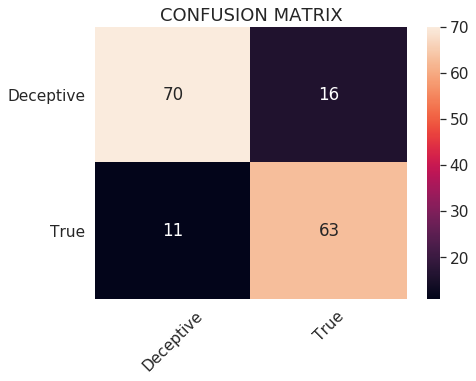

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
plt.title("CONFUSION MATRIX", fontsize= 18)
plt.show();

In [0]:
#FORMATTING THE OUTPUT

class deceptive:
    def __init__(self, text):
        self.test= nlp(text)
        
    def get_mean_vector(self, words):
        # remove out-of-vocabulary words
        words = [word for word in words if word in google_word2vec.vocab]
        if len(words) >= 1:
            return np.mean(google_word2vec[words], axis=0)
        else:
            return []
        
    def predict(self):
        self.test= [str(t) for t in self.test]
        self.vectors= self.get_mean_vector(self.test)
        return xgb.predict(pd.DataFrame([self.vectors]))[0]

In [119]:
X[0]

'The Hilton Hotel helped us make the most of our trip to Chicago. Not only are they centrally located near most of Chi towns hot spots, but they also helped coordinate discounted admissions to various other attractions. The Hilton is very classy with their accommodations. I will be returning at my earliest convenience, be it for business or pleasure.\n'

In [120]:
deceptive(X[0]).predict()

'deceptive'